In [1]:

import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/us-accidents/US_Accidents_March23.csv


## Setup Dataset as DataFrame

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


## Perform Data Preparation and Cleaning

- Look at dataframe details.
- Identify and correct invalid or NA values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.nunique()
# can use source, severity as category

ID                       7728394
Source                         3
Severity                       4
Start_Time               6131796
End_Time                 6705355
Start_Lat                2428358
Start_Lng                2482533
End_Lat                  1568172
End_Lng                  1605789
Distance(mi)               22382
Description              3761578
Street                    336306
City                       13678
County                      1871
State                         49
Zipcode                   825094
Country                        1
Timezone                       4
Airport_Code                2045
Weather_Timestamp         941331
Temperature(F)               860
Wind_Chill(F)               1001
Humidity(%)                  100
Pressure(in)                1144
Visibility(mi)                92
Wind_Direction                24
Wind_Speed(mph)              184
Precipitation(in)            299
Weather_Condition            144
Amenity                        2
Bump      

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [7]:
# Getting count of numeric columns i9n dataset
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include = numerics)
len(numeric_df.columns)

13

<Axes: >

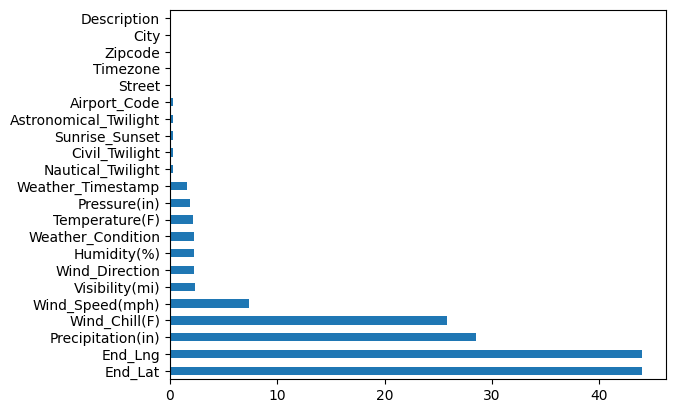

In [8]:
# Percent of missing values per column
percent_missing = df.isnull().sum().sort_values(ascending = False) * 100 / len(df)
percent_missing[percent_missing!= 0].plot(kind = 'barh')

# Usually columns with greater then 50% missing percent can be dropped.

## Perform Exploratory Analysis and Visualization

### Columns to analyse 
- Start_Time 
- End_Time
- State
- Severity
- Weather_Condition

### Relations to Visualize
- Accidents per State
- Accidents by Severity per State
- Accidents by Weather Condition
- Average Resolution Time based on Severity of accidents
- Year on Year Trend of no of accidents

### Analyze State

In [9]:
states = df.State.unique()
len(states) # output - 49
states_by_accidents = df.State.value_counts().reset_index(name='Count')
# states_by_accidents.sort_values('Count', ascending = False)
states_by_accidents.head()

,State,Count
0,CA,1741433
1,FL,880192
2,TX,582837
3,SC,382557
4,NY,347960


In [10]:
high_accident_states = states_by_accidents[states_by_accidents['Count'] >= 500000]
print(len(high_accident_states))
low_accident_states = states_by_accidents[states_by_accidents['Count'] < states_by_accidents['Count'].quantile(0.75)]
print(len(low_accident_states))

percent_high_acc_states = len(high_accident_states) * 100 / len(states)
percent_high_acc_states

3
36


6.122448979591836

#### Visualize - Accidents per State

<Axes: xlabel='No of Accidents', ylabel='State'>

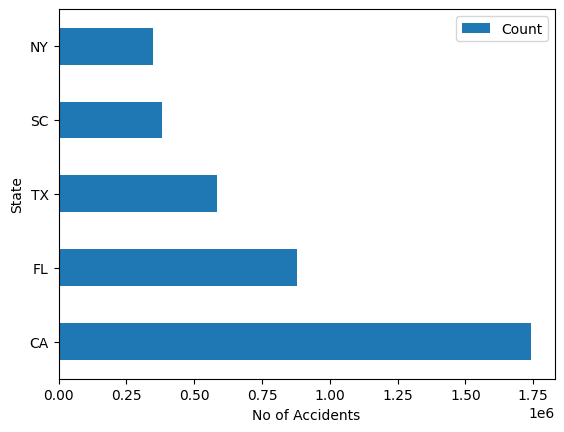

In [11]:
states_by_accidents.head(5).plot(kind='barh',x = 'State', y = 'Count', xlabel='No of Accidents')

#### Visualize - Accidents per State (Seaborn)

<Axes: xlabel='Count', ylabel='State'>

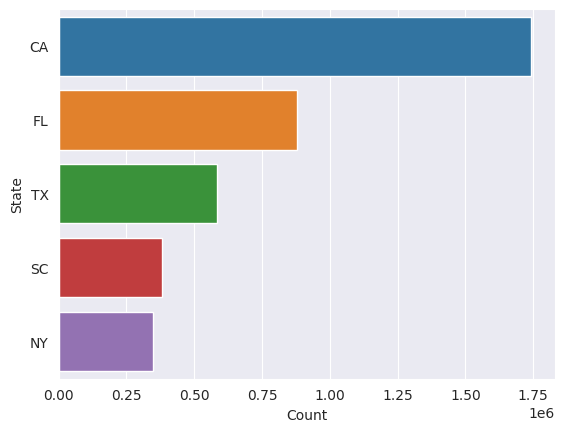

In [12]:
sns.set_style(style = 'darkgrid')
sns.barplot(states_by_accidents.head(5), y='State', x='Count')

### Analyze States and Severity

In [13]:
groupedby_states_severity = df.groupby(by=['Severity', 'State']).size().reset_index(name='Count')
groupedby_states_severity.sort_values(['Severity', 'Count'], ascending = [False, False])

,Severity,State,Count
187,4,VA,18202
180,4,PA,15867
147,4,CA,13502
152,4,FL,13149
153,4,GA,12776
...,...,...,...
19,1,ME,4
42,1,VT,3
45,1,WV,2
11,1,ID,1


#### Visualize - Accidents by Severity per State

<Axes: xlabel='Count', ylabel='State'>

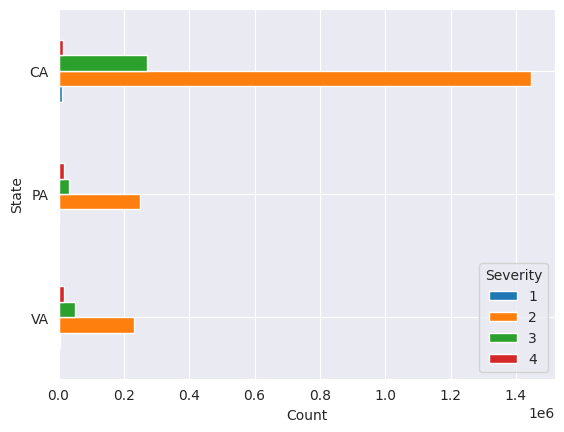

In [14]:
'''
.pivot(index='State', columns='Severity', values='counts'): This reshapes the DataFrame to have states as the index, severity levels as the columns, and counts as the values.
.plot(kind='bar'): This generates a bar plot with the reshaped DataFrame
'''
pivoted_states_severity = groupedby_states_severity.pivot(index='State', columns='Severity', values='Count')
# Showing states with highest number of high severity accidents
pivoted_states_severity.sort_values([4,3,2,1], ascending = False).head(3).plot(kind='barh', xlabel='Count')

#### Visualize - Accidents by Severity per State (Seaborn)

<Axes: xlabel='State'>

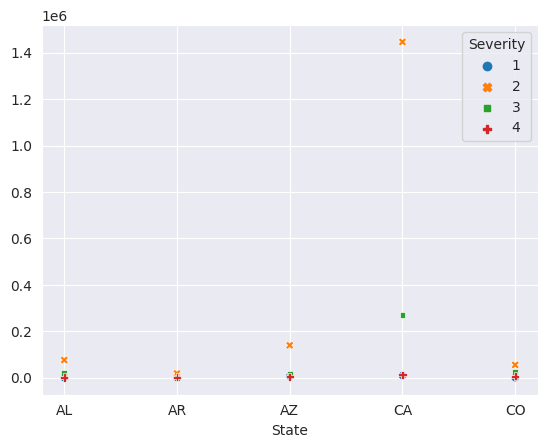

In [15]:
sns.scatterplot(pivoted_states_severity.head(5))

### Analyse Weather Conditions

In [16]:
weather_conditions = df['Weather_Condition'].unique()
weather_conditions_accidents = df['Weather_Condition'].value_counts().reset_index(name='Count')
weather_conditions_accidents.head(5)

,Weather_Condition,Count
0,Fair,2560802
1,Mostly Cloudy,1016195
2,Cloudy,817082
3,Clear,808743
4,Partly Cloudy,698972


#### Visualize - Accidents by Weather Conditions

<Axes: xlabel='Count', ylabel='Weather'>

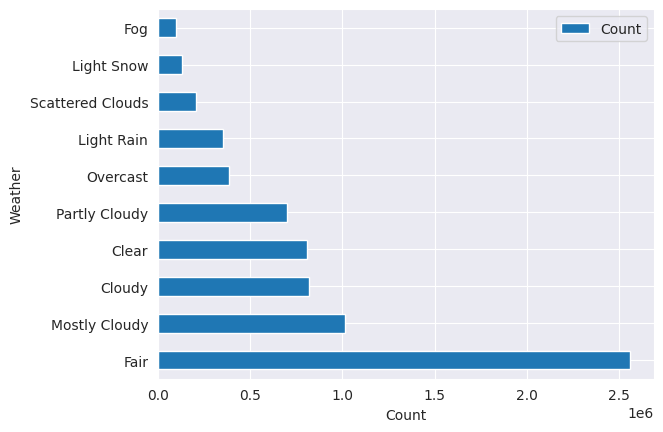

In [17]:
weather_conditions_accidents.head(10).plot(kind ='barh', x='Weather_Condition', y='Count', ylabel='Weather', xlabel='Count')
# , x='Weather_Condition', y='Count'

#### Visualize - Accidents by Weather Conditions (Seaborn)

<Axes: xlabel='Count', ylabel='Weather_Condition'>

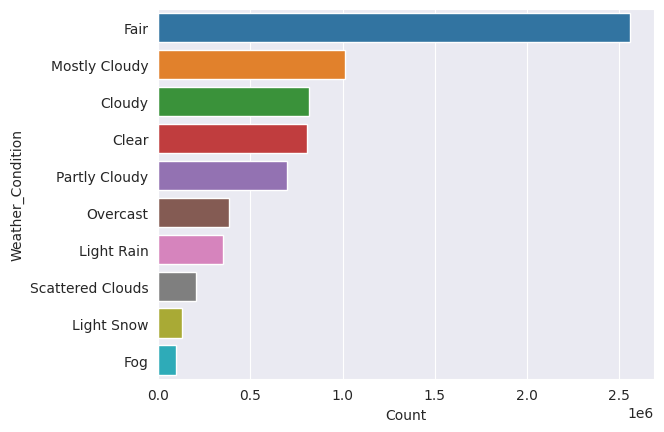

In [18]:
sns.barplot(weather_conditions_accidents.head(10), x='Count', y='Weather_Condition')

### Analyze Start_Time and End_Time

In [19]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed')
df['Resolution_Time'] = (df['End_Time'] - df['Start_Time']) / pd.Timedelta(hours=1)
df
# resolution_time = resolution_time / pd.Timedelta(hours=1)
# resolution_time.sample(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Resolution_Time
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,Night,Night,Night,Night,5.233333
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,Night,Night,Night,Day,0.500000
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,True,False,Night,Night,Day,Day,0.500000
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,Night,Day,Day,Day,0.500000
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,True,False,Day,Day,Day,Day,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,Day,Day,Day,Day,0.476667
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,Day,Day,Day,Day,0.448056
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,Day,Day,Day,Day,0.474444
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,Day,Day,Day,Day,0.489167


In [20]:
resolution_time_severity= df.groupby('Severity')['Resolution_Time'].mean()
resolution_time_severity

Severity
1     0.896383
2     8.090616
3     1.246835
4    28.089133
Name: Resolution_Time, dtype: float64

#### Visualize - Average Resolution Time

<Axes: xlabel='Time(Hours)', ylabel='Severity'>

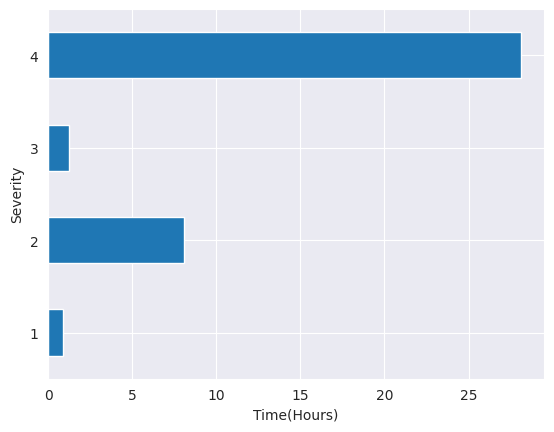

In [21]:
resolution_time_severity.plot(kind='barh', x='Resolution_Time', y='Severity', xlabel='Time(Hours)')

#### Visualize - Average Resolution Time (Seaborn)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Severity', ylabel='Resolution_Time'>

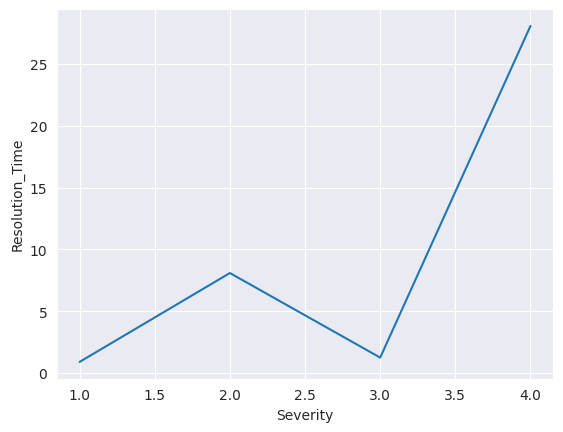

In [22]:
sns.lineplot(resolution_time_severity)

### Analyze Start Time to answer - What time of the days have most accidents occured?

In [23]:
hour_counts = pd.to_datetime(df['Start_Time']).dt.hour.value_counts().sort_index().reset_index(name='Count')
hour_counts.columns = ['Hour', 'Counts']

#### Visualize accidents across the hours of the day

<Axes: xlabel='Time Of Day'>

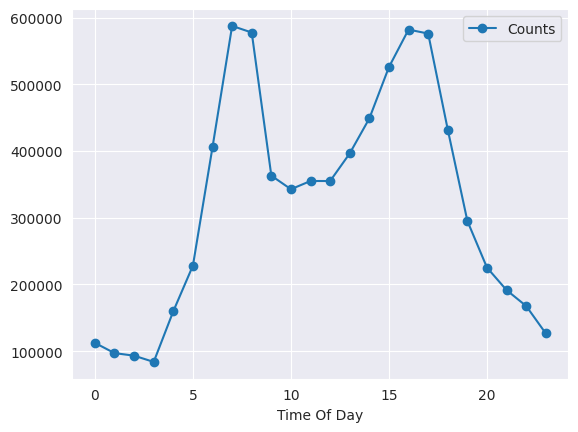

In [24]:
hour_counts.plot(kind='line', x='Hour', y='Counts', marker='o', xlabel='Time Of Day')

#### Visualize accidents across the hours of the day (Seaborn)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Hour', ylabel='Counts'>

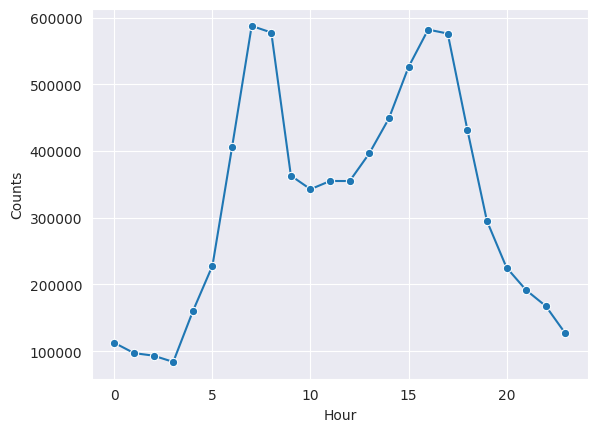

In [25]:
sns.lineplot(x='Hour', y='Counts', marker='o', data=hour_counts)

### Analyze Start Time to derive Year on Year trend

In [26]:
df['Year_Of_Accident'] = pd.to_datetime(df['Start_Time']).dt.year
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Resolution_Time,Year_Of_Accident
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,Night,Night,Night,Night,5.233333,2016
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,Night,Night,Night,Day,0.500000,2016
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,True,False,Night,Night,Day,Day,0.500000,2016
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,Night,Day,Day,Day,0.500000,2016
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,True,False,Day,Day,Day,Day,0.500000,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,Day,Day,Day,Day,0.476667,2019
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,Day,Day,Day,Day,0.448056,2019
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,Day,Day,Day,Day,0.474444,2019
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,Day,Day,Day,Day,0.489167,2019


#### Visualize Year on Year trend

<Axes: xlabel='Year_Of_Accident', ylabel='Count'>

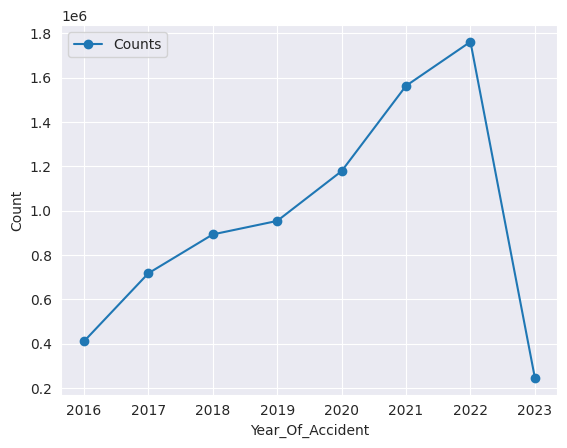

In [27]:
year_counts = df['Year_Of_Accident'].value_counts().sort_index().reset_index(name='Counts')
year_counts
year_counts.columns = ['Year_Of_Accident', 'Counts']
year_counts.plot(kind='line', x='Year_Of_Accident', y='Counts', marker='o', ylabel='Count')

#### Visualize Year on Year trend (Seaborn)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year_Of_Accident', ylabel='Counts'>

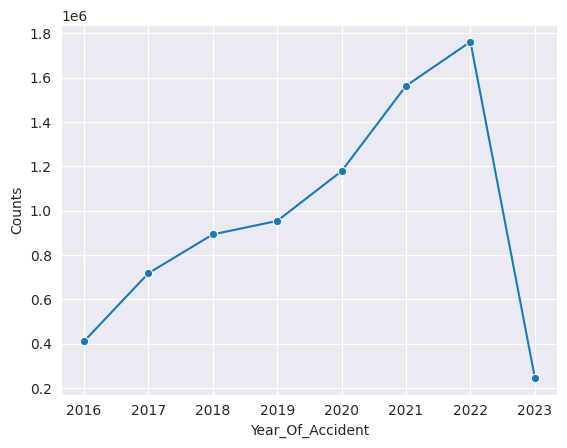

In [28]:
sns.lineplot(x='Year_Of_Accident', y='Counts', marker='o', data=df['Year_Of_Accident'].value_counts(ascending = True).reset_index(name='Counts'))